In [57]:
# Imports
import pandas as pd
import numpy as np
import json
import seaborn as sns
pd.set_option('display.max_rows', 400)

In [58]:
# Helper functions from helper_functions.py (couldn't import for some reason)

def set_nulls(data):
    """
   @param data: dataframe
   
   @return dataframe with -99 replaced with NaN
    """
    data.replace(to_replace = -99, value = np.nan, inplace = True)
    data.replace(to_replace = -99.0, value = np.nan, inplace = True)
    data.replace(to_replace = '-99', value= np.nan, inplace = True)      
    return data

def map_cpt(data, column, replace, name):
    """
    @param data: dataframe
    @param column: string, column name
    @param replace: list of variables holding the values to be replaced by that particular variable name
    @ param name: string or integer of what will replace the values in replacements

    """
    for r in replace:
        idx = np.where(data[column] == r)[0]
        data[column].loc[idx] = name
    
    return data

In [59]:
data = pd.read_csv('../data/monet_output.csv')
data.drop(['Unnamed: 0', 'X'], axis = 1, inplace = True)
#df_clean = set_nulls(data)
df_clean = data
op1 = ['COLCT TOT ABDL W/O PRCTECT W/CONTINENT ILEOST']
op2 = ['COLCT TOT ABDL W/O PRCTECT W/ILEOST/ILEOPXTS', 'LAPS COLECTOMY TOT W/O PRCTECT W/ILEOST/ILEOPXTS']
op3 = ['COLECTOMY PARTIAL W/ANASTOMOSIS', 'LAPAROSCOPY COLECTOMY PARTIAL W/ANASTOMOSIS']
op4 = ['COLECTOMY PRTL ABDOMINAL & TRANSANAL APPROACH', 'COLECTOMY PRTL ABDOMINAL & TRANSANAL APPR']
op5 = ['COLECTOMY PRTL W/COLOPROCTOSTOMY', 'LAPS COLECTOMY PRTL W/COLOPXTSTMY LW ANAST']
op6 = ['COLECTOMY PRTL W/COLOPROCTOSTOMY & COLOSTOMY', 'LAPS COLECTMY PRTL W/COLOPXTSTMY LW ANAST W/CLST']
op7 = ['COLECTOMY PRTL W/COLOST/ILEOST & MUCOFISTULA']
op8 = ['COLECTOMY PRTL W/END COLOSTOMY & CLSR DSTL SGMT', 'COLECTOMY PRTL W/END COLOSTOMY&CLSR DSTL SGMT', 'LAPS COLECTOMY PRTL W/END CLST & CLSR DSTL SGM', 'LAPS COLECTOMY PRTL W/END CLST&CLSR DSTL SGM']
op9 = ['COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS', 'COLECTOMY PRTL W/RMVL TERMINAL ILEUM&ILEOCOLOST', 'LAPS COLECTOMY PRTL W/RMVL TERMINAL ILEUM', 'COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOST']
op10 = ['COLECTOMY PRTL W/SKIN LEVEL CECOST/COLOSTOMY']
num_replacements = [op1, op2, op3, op4, op5, op6, op7, op8, op9, op10]
for i in range(len(num_replacements)):
    df_clean = map_cpt(df_clean, 'PRNCPTX', num_replacements[i], i+1)

MIS = ['Laparoscopic', 'Endoscopic w/ unplanned conversion to open', 'Hybrid', 'Hybrid w/ open assist', 'Laparoscopic Hand Assisted', 'Laparoscopic w/ open assist', 'Laparoscopic w/ unplanned conversion to open', 'Laparoscopic w/ unplanned conversion to Open', 'Other MIS approach', 'Robotic', 'Robotic w/ open assist', 'Robotic w/ unplanned conversion to open', 'SILS', 'SILS w/ open assist', 'SILS w/ unplanned conversion to open', 'Hybrid w/ unplanned conversion to open', 'Endoscopic w/ open assist', 'Other MIS approach w/ open assist', 'Endoscopic', 'NOTES', 'NOTES w/ open assist', 'Other MIS approach w/ unplanned conversion to open', 'NOTES w/ unplanned conversion to open']
Open = ['Open', 'Open (planned)']
options = [MIS, Open]
names = ['MIS', 'open']
for i in range(len(options)):
    df_clean = map_cpt(df_clean, 'COL_APPROACH', options[i], names[i])

#convert unknowns to NAs
nulls = np.where(df_clean.COL_APPROACH == 'Unknown')[0]
df_clean.COL_APPROACH.loc[nulls] = np.nan

unplanned = [c for c in df_clean if "UNPLANNEDREADMISSION" in c]
df_clean['num_unplanned'] = df_clean[unplanned].sum(axis=1)
df_clean['target'] = [1 if x>0 else 0 for x in df_clean['num_unplanned']]

othercpt = [c for c in df_clean if "OTHERCPT" in c]
df_clean['num_other_procs'] = df_clean[othercpt].count(axis=1)
concurrcpt = [c for c in df_clean if "CONCURR" in c]
df_clean['num_concurr_procs'] = df_clean[concurrcpt].count(axis=1)

/Users/saraokun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,17,19,23,25,27,28,29,30,32,33,36,37,38,39,40,41,42,43,50,51,83,86,89,92,94,95,97,100,103,106,110,113,116,121,124,127,130,133,136,188,190,201,212,231,232,242,244,247,249,256,262,267,273,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,305,318,320,333,334) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/saraokun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
f = open('../data/data_cleaning.json',)
clean_dict = json.load(f)

In [61]:
cols_to_drop = clean_dict['cols_to_drop']
df_clean.drop(columns=cols_to_drop, inplace=True)

In [62]:
def ensure_before_readmission(df, day_col, binary_col, cols_to_drop=[]):
    # Create a variable to check if readmission is before the particular column by setting null values extremely high
    days_to_readmission = df_clean['READMPODAYS1'].fillna(999)
    df.loc[(days_to_readmission - df_clean[day_col])<=0, binary_col] = 0
    dropcols = cols_to_drop + [day_col]
    df.drop(columns=dropcols, inplace=True)
    return df

In [63]:
ensure_dict = clean_dict['ensure_before_readmission']
for binary_col in ensure_dict.keys():
    df_clean = ensure_before_readmission(df_clean, ensure_dict[binary_col]['day_col'], binary_col, ensure_dict[binary_col]['cols_to_drop'])

In [64]:
df_clean.shape

(257913, 139)

In [65]:
#binarizing SEX variable
df_clean.SEX.replace('male', 0, inplace = True)
df_clean.SEX.replace('female', 1, inplace = True)
df_clean.SEX.replace('non-bi', np.nan, inplace = True)

df_clean.rename(columns={'SEX': 'female'}, inplace = True)

df_clean.INOUT.replace('Inpatient', 1, inplace = True)
df_clean.INOUT.replace('Outpatient', 0, inplace = True)
df_clean.rename(columns = {'INOUT': 'inpatient'}, inplace = True)

df_clean['insulin'] = df_clean.DIABETES
df_clean.insulin.replace(['NON-INSULIN','NO'], 0, inplace = True)
df_clean.insulin.replace('INSULIN', 1, inplace = True)

df_clean.DIABETES.replace(['NON-INSULIN', 'INSULIN'], 1, inplace = True)
df_clean.DIABETES.replace('NO', 0, inplace = True)
df_clean.rename(columns = {'DIABETES': 'diabetes'}, inplace = True)

df_clean["bmi"] = (df_clean.WEIGHT/2.205)/((df_clean.HEIGHT/39.37)**2)

df_clean.drop(['HEIGHT', 'WEIGHT'], axis = 1, inplace = True)

df_clean.REOPERATION2.replace(np.nan, 0, inplace = True)

df_clean.drop(['num_unplanned'], axis = 1, inplace = True)

#target in disguise--leakage
df_clean.drop(['READMPODAYS1', 'CASEID'], axis = 1, inplace = True)

In [66]:
df_clean.shape

(257913, 136)

# Target Correlation

In [68]:
target_corr = df_clean.corr()['target'].sort_values(ascending = False)

In [22]:
target_corr[0:21]

target          1.000000
OTHBLEED        0.363637
OTHSYSEP        0.215155
ORGSPCSSI       0.201094
RETORPODAYS     0.194705
RETURNOR        0.187300
SUPINFEC        0.177046
OTHSESHOCK      0.166088
REOPERATION1    0.162578
COL_ILEUS       0.143845
FAILWEAN        0.143522
URNINFEC        0.138374
OUPNEUMO        0.138325
OTHDVT          0.112178
REINTUB         0.098318
OTHCDIFF        0.091848
CDMI            0.084529
DEHIS           0.083142
RENAINSF        0.081643
MORBPROB        0.078516
OSSIPATOS       0.078178
Name: target, dtype: float64

In [21]:
correlations = df_clean.corr()
perc = correlations.abs().describe()
df_corr = df_clean[perc.columns[(perc.loc["75%"] >= 0.09).values].to_list() + ["target"]].corr()

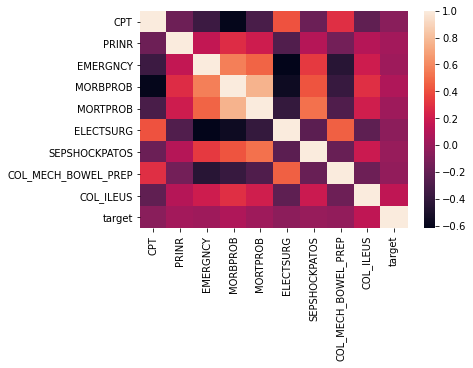

In [22]:
sns.heatmap(df_corr)

In [109]:
df_clean.shape

(257913, 137)

# Fixing stuff from week 5 ppt

In [67]:
df_clean.dropna(subset = ['AGE','female'], inplace = True)

#drop columns used before 2014 but not after--add to json
df_clean.drop(['ANETIME', 'SURGANE', 'ANESURG', 'DPATRM', 'COL_STEROID', 'COL_STEROID_UNK'], axis = 1, inplace = True)

#remove re zoran
df_clean.drop(['PODIAGTX10', 'PODIAGTX', 'PODIAG10', 'PODIAG_OTHER','PODIAG_OTHER10','ANESTHES_OTHER', 'RETORPODAYS', 'PODIAG'], axis = 1, inplace = True)

df_clean.drop(['COL_ICD9_INDICATION','COL_ICD9_EMERGENT', 'REOPORICD91', 'COL_ICD10_INDICATION', 'COL_ICD10_EMERGENT', 'COL_INDICATION', 'COL_EMERGENT'], axis = 1, inplace = True)

In [68]:
df_clean.drop(['COL_STERIOD', 'COL_STERIOD_UNK'], axis = 1, inplace = True)

In [69]:
idx = np.where(df_clean.BLEEDDIS.isnull() == False)[0]
replace = df_clean.BLEEDDIS.iloc[idx]
df_clean.BLEEDIS.iloc[idx] = replace

/Users/saraokun/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
df_clean.drop('BLEEDDIS', axis = 1, inplace = True)

In [71]:
df_clean.reset_index(inplace = True, drop = True)

In [45]:
df_clean.isnull().sum()

female                          0
PRNCPTX                         0
CPT                             0
WORKRVU                         0
inpatient                       0
TRANST                        271
ANESTHES                       10
SURGSPEC                        2
diabetes                        0
SMOKE                           0
DYSPNEA                         0
FNSTATUS2                    1027
VENTILAT                        0
HXCOPD                          0
ASCITES                         0
HXCHF                           0
HYPERMED                        0
RENAFAIL                        0
DIALYSIS                        0
DISCANCR                        0
WNDINF                          0
STEROID                         0
WTLOSS                          0
TRANSFUS                        0
PRSEPIS                         0
PRSODM                          0
PRBUN                           0
PRCREAT                         0
PRALBUM                         0
PRBILI        

In [72]:
df_clean.shape

(253773, 112)

# Label Encode categorical variables

In [259]:
from sklearn.preprocessing import LabelEncoder

In [260]:
le = LabelEncoder()

In [261]:
df_clean.dtypes

CASEID                     float64
female                     float64
PRNCPTX                     object
CPT                          int64
WORKRVU                    float64
inpatient                    int64
TRANST                      object
ANESTHES                    object
SURGSPEC                    object
diabetes                     int64
SMOKE                        int64
DYSPNEA                     object
FNSTATUS2                   object
VENTILAT                     int64
HXCOPD                       int64
ASCITES                      int64
HXCHF                        int64
HYPERMED                     int64
RENAFAIL                     int64
DIALYSIS                     int64
DISCANCR                     int64
WNDINF                       int64
STEROID                      int64
WTLOSS                       int64
TRANSFUS                     int64
PRSEPIS                     object
PRSODM                     float64
PRBUN                      float64
PRCREAT             

In [262]:
cat_feat = [col for col in df_clean.columns if df_clean[col].dtype == 'O']
cat_feat

['PRNCPTX',
 'TRANST',
 'ANESTHES',
 'SURGSPEC',
 'DYSPNEA',
 'FNSTATUS2',
 'PRSEPIS',
 'WNDCLAS',
 'ASACLAS',
 'RACE_NEW',
 'DISCHDEST',
 'WOUND_CLOSURE',
 'COL_APPROACH',
 'COL_MALIGNANCYT',
 'COL_MALIGNANCYN',
 'COL_MALIGNANCYM',
 'COL_ANASTOMOTIC']

In [263]:
encodings = {}
for c in cat_feat:
    df_clean[c] = le.fit_transform(df_clean[c].astype(str))
    encodings[c] = dict(zip(le.classes_, le.transform(le.classes_)))

In [264]:
df_clean.dtypes

CASEID                     float64
female                     float64
PRNCPTX                      int64
CPT                          int64
WORKRVU                    float64
inpatient                    int64
TRANST                       int64
ANESTHES                     int64
SURGSPEC                     int64
diabetes                     int64
SMOKE                        int64
DYSPNEA                      int64
FNSTATUS2                    int64
VENTILAT                     int64
HXCOPD                       int64
ASCITES                      int64
HXCHF                        int64
HYPERMED                     int64
RENAFAIL                     int64
DIALYSIS                     int64
DISCANCR                     int64
WNDINF                       int64
STEROID                      int64
WTLOSS                       int64
TRANSFUS                     int64
PRSEPIS                      int64
PRSODM                     float64
PRBUN                      float64
PRCREAT             

In [265]:
df_clean.isnull().sum().sort_values(ascending = False)

COL_MARGINS                246479
RETORRELATED               245768
PODIAG                     167452
RETORPODAYS                103712
OTHCDIFF                    64192
COL_NODESEVAL               37794
COL_MECH_BOWEL_PREP         31237
ETHNICITY_HISPANIC          28967
COL_ORAL_ANTIBIOTIC         28244
COL_CHEMO                    2323
COL_ILEUS                     654
ELECTSURG                     134
UTIPATOS                        0
PNAPATOS                        0
OSSIPATOS                       0
VENTPATOS                       0
AGE                             0
DSSIPATOS                       0
ADMYR                           0
CASEID                          0
DISCHDEST                       0
SSSIPATOS                       0
STILLINHOSP                     0
ADMQTR                          0
RACE_NEW                        0
PUFYEAR                         0
MORTPROB                        0
MORBPROB                        0
RETURNOR                        0
OTHSESHOCK    

# OHE

In [266]:
from sklearn.preprocessing import OneHotEncoder

In [267]:
#ohe returns an array
ohe = OneHotEncoder(drop = 'first')
ohe.fit(df_clean[cat_feat])

OneHotEncoder(drop='first')

In [268]:
ohe_labels = ohe.transform(df_clean[cat_feat]).toarray()

In [269]:
#need to drop the columns that had like 300 categories before doing this
ohe_labels.shape

(253773, 104)

In [270]:
df_cat = pd.DataFrame(ohe_labels, columns = ohe.get_feature_names(cat_feat))

In [271]:
df_cat.shape

(253773, 104)

In [275]:
df_clean.drop(cat_feat, axis = 1, inplace = True)

In [276]:
len(cat_feat)

17

In [244]:
df_clean.shape

(253773, 98)

In [277]:
df_clean.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            257903, 257904, 257905, 257906, 257907, 257908, 257909, 257910,
            257911, 257912],
           dtype='int64', length=253773)

In [283]:
df_cat.index

RangeIndex(start=0, stop=253773, step=1)

In [242]:
df_ohe = pd.concat([df_clean, df_cat], axis = 1)

In [243]:
df_ohe.shape

(257859, 202)

# Put OHE stuff into a function

In [96]:
for c in cat_feat:
    print(c)
    print(df_clean[c].value_counts())

PRNCPTX
3     83132
9     60606
5     58685
8     21127
2     13487
6      7046
10     4726
7      4276
4       387
1       301
Name: PRNCPTX, dtype: int64
TRANST
Not transferred (admitted from home)               234671
From acute care hospital inpatient                   7980
Outside emergency department                         6764
Nursing home - Chronic care - Intermediate care      3027
Transfer from other                                  1060
Name: TRANST, dtype: int64
ANESTHES
General            252554
Epidural              328
Spinal                285
Other                 281
MAC/IV Sedation       171
Regional              100
None                   32
Local                  12
Name: ANESTHES, dtype: int64
SURGSPEC
General Surgery         252027
Gynecology                1099
Vascular                   417
Urology                    114
Orthopedics                 39
Otolaryngology (ENT)        29
Thoracic                    17
Neurosurgery                13
Cardiac Surgery  

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def le_ohe(data, features):
    le = LabelEncoder()
    encodings = {}
    for c in features:
        data[c] = le.fit_transform(data[c].astype(str))
        encodings[c] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    import json
    with open('encodings.txt', 'w') as mappings:
         for key, value in encodings.items(): 
            mappings.write('%s:%s\n' % (key, value))
    
    ohe = OneHotEncoder(drop = 'first')
    ohe.fit(data[features]) 
    ohe_labels = ohe.transform(data[features]).toarray()
    df_cat = pd.DataFrame(ohe_labels, columns = ohe.get_feature_names(features))
    print(df_cat.shape)

    data.drop(features, axis = 1, inplace = True)
    print(data.shape)
    clean_data = pd.concat([data, df_cat], axis = 1)
    return clean_data

#get categorical features
cat_feat = [col for col in df_clean.columns if (df_clean[col].dtype == 'O') or (df_clean[col].isnull().sum() != 0)]

#ohe
clean_data = le_ohe(df_clean, cat_feat)

(253773, 224)
(253773, 85)


In [49]:
clean_data.isnull().sum()

female                     0
CPT                        0
WORKRVU                    0
inpatient                  0
diabetes                   0
SMOKE                      0
VENTILAT                   0
HXCOPD                     0
ASCITES                    0
HXCHF                      0
HYPERMED                   0
RENAFAIL                   0
DIALYSIS                   0
DISCANCR                   0
WNDINF                     0
STEROID                    0
WTLOSS                     0
TRANSFUS                   0
PRSODM                     0
PRBUN                      0
PRCREAT                    0
PRALBUM                    0
PRBILI                     0
PRSGOT                     0
PRALKPH                    0
PRWBC                      0
PRHCT                      0
PRPLATE                    0
PRPTT                      0
PRINR                      0
PRPT                       0
EMERGNCY                   0
OPTIME                     0
HDISDT                     0
TOTHLOS       

In [74]:
#handle the -99
clean_data = set_nulls(clean_data)
clean_data.isnull().sum()

female                          0
CPT                             0
WORKRVU                         0
inpatient                       0
diabetes                        0
SMOKE                           0
VENTILAT                        0
HXCOPD                          0
ASCITES                         0
HXCHF                           0
HYPERMED                        0
RENAFAIL                        0
DIALYSIS                        0
DISCANCR                        0
WNDINF                          0
STEROID                         0
WTLOSS                          0
TRANSFUS                        0
PRSODM                      16702
PRBUN                       24348
PRCREAT                     15189
PRALBUM                     68915
PRBILI                      69020
PRSGOT                      73884
PRALKPH                     69110
PRWBC                       12751
PRHCT                       11065
PRPLATE                     12997
PRPTT                      161740
PRINR         

In [75]:
nulls = [col for col in clean_data.columns if (clean_data[col].isnull().sum() != 0)]
nulls

['PRSODM',
 'PRBUN',
 'PRCREAT',
 'PRALBUM',
 'PRBILI',
 'PRSGOT',
 'PRALKPH',
 'PRWBC',
 'PRHCT',
 'PRPLATE',
 'PRPTT',
 'PRINR',
 'PRPT',
 'OPTIME',
 'HDISDT',
 'TOTHLOS',
 'AGE',
 'HTOODAY',
 'DOPTODIS',
 'COL_MECH_BOWEL_PREP_UNK',
 'COL_ORAL_ANTIBIOTIC_UNK',
 'COL_CHEMO_UNK',
 'COL_MARGINS_UNK',
 'COL_ILEUS_UNK']

In [76]:
clean_data.dropna(subset = ['AGE'], inplace = True)

In [78]:
clean_data.drop(['COL_MECH_BOWEL_PREP_UNK',
 'COL_ORAL_ANTIBIOTIC_UNK',
 'COL_CHEMO_UNK',
 'COL_MARGINS_UNK',
 'COL_ILEUS_UNK'], axis = 1, inplace = True)

In [79]:
clean_data.shape

(253772, 304)

In [82]:
nulls = [col for col in clean_data.columns if (clean_data[col].isnull().sum() != 0)]
nulls

['PRSODM',
 'PRBUN',
 'PRCREAT',
 'PRALBUM',
 'PRBILI',
 'PRSGOT',
 'PRALKPH',
 'PRWBC',
 'PRHCT',
 'PRPLATE',
 'PRPTT',
 'PRINR',
 'PRPT',
 'OPTIME',
 'HDISDT',
 'TOTHLOS',
 'HTOODAY',
 'DOPTODIS']

In [80]:
clean_data.isnull().sum()

female                        0
CPT                           0
WORKRVU                       0
inpatient                     0
diabetes                      0
SMOKE                         0
VENTILAT                      0
HXCOPD                        0
ASCITES                       0
HXCHF                         0
HYPERMED                      0
RENAFAIL                      0
DIALYSIS                      0
DISCANCR                      0
WNDINF                        0
STEROID                       0
WTLOSS                        0
TRANSFUS                      0
PRSODM                    16702
PRBUN                     24348
PRCREAT                   15189
PRALBUM                   68914
PRBILI                    69019
PRSGOT                    73883
PRALKPH                   69109
PRWBC                     12751
PRHCT                     11065
PRPLATE                   12997
PRPTT                    161739
PRINR                    128116
PRPT                     251853
EMERGNCY

In [83]:
temp_data = clean_data.drop(nulls, axis =1)
temp_data.shape

(253772, 286)

# DT baseline attempt

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [85]:
X = temp_data.drop('target', axis = 1)
y = temp_data['target']

# 70 20 10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

In [86]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(171295, 285)
(57099, 285)
(25378, 285)


In [87]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:,1]

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.6819778303367839

In [89]:
importances = {}
for name, importance in zip(X_val.columns, dt.feature_importances_):
    importances[name] = importance

In [90]:
imp = pd.DataFrame.from_dict(importances, orient = 'index', columns = ['importance'])
imp.sort_values(by = 'importance', ascending = False)

,importance
OTHBLEED,0.130548
MORTPROB,0.072920
MORBPROB,0.070155
bmi,0.064048
AGE,0.045510
OTHSYSEP,0.036662
RETURNOR,0.025182
SUPINFEC,0.020622
ORGSPCSSI,0.019727
DISCHDEST_3,0.018241
